# Diabetes Prediction using KNN

## Objective
This project illustrates how machine learning techniques like KNN in this case, can be applied to predict diabetes. By utilizing key health indicators such as glucose levels, BMI, and insulin, the aim of this project is to offer reliable predictions that can help in the early detection and management of diabetes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

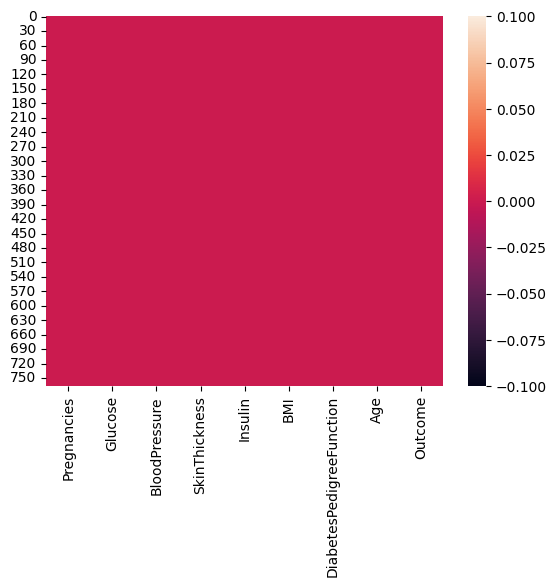

In [6]:
sns.heatmap(df.isnull())

In [7]:
zero = (df == 0).sum()
zero

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64

In [8]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [9]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

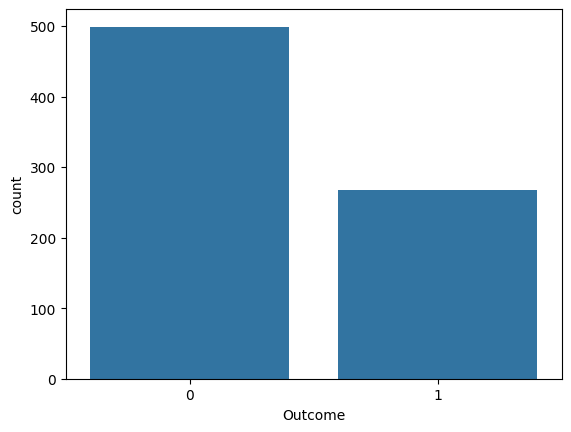

In [10]:
sns.countplot(x='Outcome', data=df)

In [11]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
762    0
763    0
764    0
765    0
766    1
Name: Outcome, Length: 767, dtype: int64

In [12]:
X = df.drop(['Outcome'], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X = sc.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train, X_test

(array([[ 0.93563822,  0.9304985 ,  0.46379087, ...,  0.3994804 ,
          0.66384658,  1.76493455],
        [ 0.04490444, -0.8117379 , -1.02426323, ..., -0.61870629,
         -0.08778322, -0.95744816],
        [-1.14274059,  1.42358428,  1.45582695, ...,  2.88676502,
         -0.13608072, -0.8723737 ],
        ...,
        [ 0.04490444, -0.91035506, -0.61091487, ..., -1.12779963,
         -0.97826832, -1.04252262],
        [ 2.12328325, -1.20620652,  0.13311218, ..., -0.34234133,
         -0.5194421 ,  0.14851982],
        [ 0.3418157 ,  0.47028511,  0.79446957, ..., -0.06597637,
          0.50687971,  3.04105145]], shape=(613, 8)),
 array([[-0.84582934,  2.54124537,  0.29845153, ...,  1.51948575,
          2.78289926, -0.95744816],
        [-0.54891808, -0.48301405,  0.13311218, ...,  0.16675201,
         -0.20550837, -0.8723737 ],
        [ 0.04490444, -1.50205799, -0.85892389, ...,  0.22493411,
         -0.24475008, -0.70222478],
        ...,
        [ 0.04490444,  0.66751942,  1.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=25)

model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [17]:
y_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [19]:
accuracy = accuracy_score(y_test, y_predict)

print(f"The accuracy of KNN model is: {accuracy: .2f}")

The accuracy of KNN model is:  0.83


In [20]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       107
           1       0.76      0.66      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154



In [21]:
print(f1_score(y_test,y_predict))

0.7045454545454546


In [22]:
print(confusion_matrix(y_test, y_predict))

[[97 10]
 [16 31]]


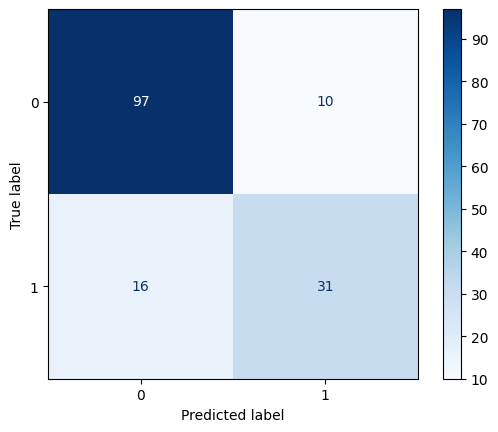

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predict, cmap='Blues')

- To find the K value with the highest accuracy

In [24]:
score=[]
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    score.append(accuracy_score(y_test, pred_i))

In [25]:
score

[0.7142857142857143,
 0.7597402597402597,
 0.7402597402597403,
 0.7402597402597403,
 0.7727272727272727,
 0.7922077922077922,
 0.8051948051948052,
 0.8116883116883117,
 0.8181818181818182,
 0.8116883116883117,
 0.8246753246753247,
 0.8181818181818182,
 0.8181818181818182,
 0.8051948051948052,
 0.8181818181818182,
 0.7987012987012987,
 0.8116883116883117,
 0.8051948051948052,
 0.8051948051948052,
 0.8051948051948052,
 0.8116883116883117,
 0.7987012987012987,
 0.8116883116883117,
 0.8246753246753247,
 0.8311688311688312,
 0.8246753246753247,
 0.8246753246753247,
 0.8051948051948052,
 0.7987012987012987]

Text(0, 0.5, 'Accuracy Score')

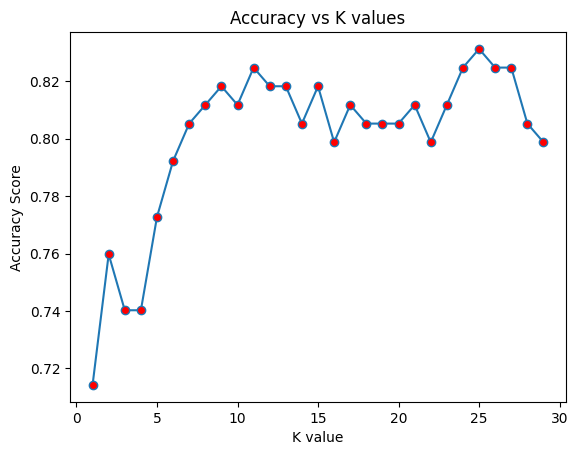

In [26]:
plt.plot(range(1, 30),score, marker='o', markerfacecolor='red')
plt.title('Accuracy vs K values')
plt.xlabel('K value')
plt.ylabel('Accuracy Score')